<a href="https://colab.research.google.com/github/abhinethraRG/neural-network-credit-rating-prediction/blob/main/Neural_Network_Credit_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **II. ML and Credit Ratings.**


## 1. Import libraries.
Installing necessary python libraries to build the model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

## 2. Historical Data for ML Credit rating, and EDA.
This code loads a CSV for credit rating analysis, explores the data, cleans missing values, and displays the distribution of credit ratings, a thorough start for preparing data for machine learning.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3854 non-null   int64  
 1   cash          3854 non-null   float64
 2   cratio        3854 non-null   float64
 3   int_coverage  3854 non-null   float64
 4   crating       3854 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 150.7+ KB
None

First few rows of data:
   id      cash    cratio  int_coverage crating
0   1  0.033710  2.197026      6.400783      BB
1   2  0.006848  2.651447     26.945450     BB+
2   3  0.197146  0.778815      1.583232      B-
3   4  0.201701  0.760103      2.166163       D
4   5  0.184529  0.901526      7.196721       B

Summary statistics:
                id         cash       cratio  int_

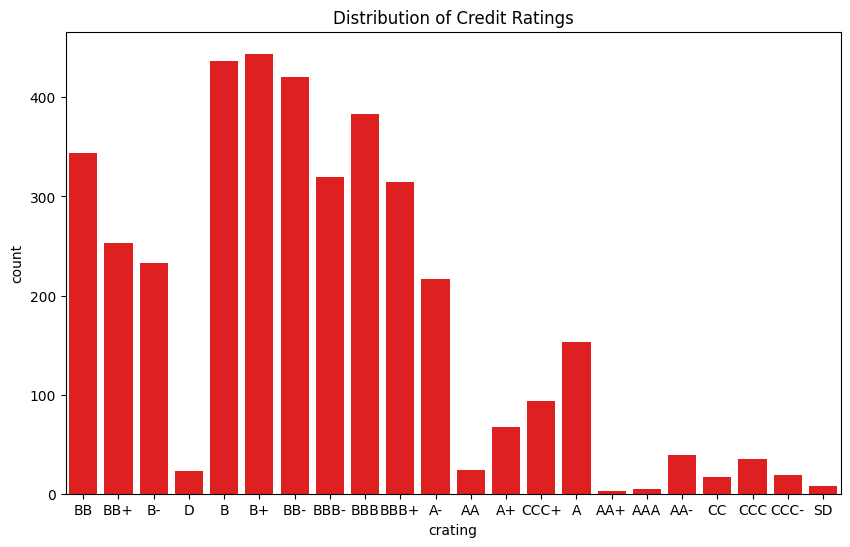

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file from Google Drive
df = pd.read_csv('/content/drive/My Drive/ML_CreditRating.csv')

# Exploratory Data Analysis (EDA)
print("Data info:")
print(df.info())

print("\nFirst few rows of data:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Remove rows with missing values
df.dropna(inplace=True)

# Check distribution of target variable (Credit Rating)
plt.figure(figsize=(10, 6))
sns.countplot(x='crating', data=df, color='red')
plt.title("Distribution of Credit Ratings")
plt.show()

##3. Data Preprocessing

This code snippet counts the occurrences of each unique credit rating in the dataset, creates a new DataFrame to hold these counts, and then displays the resulting summary table. This is an essential step in understanding the frequency distribution of the categorical data within the 'crating' column.


In [ ]:
import pandas as pd

# Get the counts of each unique value in the 'crating' column
rating_counts = df['crating'].value_counts()

# Create a DataFrame from the value counts
rating_table = pd.DataFrame({'Credit Rating': rating_counts.index, 'Count': rating_counts.values})

# Display the table
print(rating_table)


   Credit Rating  Count
0             B+    444
1              B    437
2            BB-    421
3            BBB    383
4             BB    344
5           BBB-    320
6           BBB+    315
7            BB+    253
8             B-    233
9             A-    217
10             A    153
11          CCC+     94
12            A+     67
13           AA-     39
14           CCC     35
15            AA     24
16             D     23
17          CCC-     19
18            CC     17
19            SD      8
20           AAA      5
21           AA+      3


In [ ]:
# Data Preprocessing
# Feature scaling
scaler = StandardScaler()

# Extract relevant columns for feature scaling
columns_to_scale = ['cash', 'cratio', 'int_coverage']

# Scale the numeric features
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print output statement
print("Feature scaling completed. Scaled features:")
print(df[columns_to_scale].head())


Feature scaling completed. Scaled features:
       cash    cratio  int_coverage
0 -0.597872  0.393332     -0.097281
1 -0.859725  0.780124      0.078508
2  0.995296 -0.813813     -0.138502
3  1.039702 -0.829740     -0.133514
4  0.872302 -0.709365     -0.090470


In [ ]:
# Check data types of columns in the DataFrame
print(df.dtypes)

id                int64
cash            float64
cratio          float64
int_coverage    float64
crating          object
dtype: object


## 4.1 Random Forest model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = df

# Data preprocessing
data.dropna(inplace=True)
data['crating'] = data['crating'].astype('category')

# Define a function to classify credit ratings into classes
def classify_credit_rating(rating):
    if rating in ['AAA', 'AA', 'A', 'AA+', 'A+', 'AA-', 'A-']:
        return 'High'
    elif rating in ['BBB', 'BB', 'B', 'BBB+', 'BB+', 'B+', 'BBB-', 'BB-', 'B-']:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create a new column with credit rating classes
data['rating_class'] = data['crating'].apply(classify_credit_rating)

# Encoding categorical target variable (credit rating classes) using LabelEncoder
label_encoder = LabelEncoder()
data['rating_class_encoded'] = label_encoder.fit_transform(data['rating_class'])

# Split data into inputs (X) and output (y)
X = data[['cash', 'cratio', 'int_coverage']]
y = data['rating_class_encoded']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for random forest:", accuracy)

# Classification report
target_names = label_encoder.classes_
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy for random forest: 0.8054474708171206
Classification Report:
              precision    recall  f1-score   support

        High       0.35      0.16      0.22       101
         Low       0.31      0.17      0.22        29
      Medium       0.85      0.94      0.89       641

    accuracy                           0.81       771
   macro avg       0.50      0.42      0.44       771
weighted avg       0.76      0.81      0.78       771



**Comment:** The model predicts 'Medium' credit ratings well but struggles with 'High' and 'Low' categories, indicating room for improvement in model performance or data balance. Overall accuracy is at 80.5%.

## 4.2 Neural network model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the dataset
data = df

# Define a function to classify credit ratings into classes
def classify_credit_rating(rating):
    if rating in ['AAA', 'AA', 'A', 'AA+', 'A+', 'AA-', 'A-']:
        return 'High'
    elif rating in ['BBB', 'BB', 'B', 'BBB+', 'BB+', 'B+', 'BBB-', 'BB-', 'B-']:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create a new column with credit rating classes
data['rating_class'] = data['crating'].apply(classify_credit_rating)

# Encoding categorical target variable (credit rating classes) using LabelEncoder
label_encoder = LabelEncoder()
data['rating_class_encoded'] = label_encoder.fit_transform(data['rating_class'])

# Split data into inputs (X) and output (y)
X = data[['cash', 'cratio', 'int_coverage']]
y = data['rating_class_encoded']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes (High, Medium, Low)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
target_names = label_encoder.classes_
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



Epoch 1/100
155/155 [==============================] - 4s 10ms/step - loss: 0.7391 - accuracy: 0.7785
Epoch 2/100
155/155 [==============================] - 1s 8ms/step - loss: 0.6433 - accuracy: 0.8128
Epoch 3/100
155/155 [==============================] - 1s 6ms/step - loss: 0.6173 - accuracy: 0.8122
Epoch 4/100
155/155 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.8122
Epoch 5/100
155/155 [==============================] - 1s 3ms/step - loss: 0.5886 - accuracy: 0.8132
Epoch 6/100
155/155 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.8125
Epoch 7/100
155/155 [==============================] - 1s 5ms/step - loss: 0.5785 - accuracy: 0.8128
Epoch 8/100
155/155 [==============================] - 1s 5ms/step - loss: 0.5689 - accuracy: 0.8125
Epoch 9/100
155/155 [==============================] - 1s 5ms/step - loss: 0.5687 - accuracy: 0.8145
Epoch 10/100
155/155 [==============================] - 1s 5ms/step - loss: 0.5513 - accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comment:** The neural network excels at predicting 'Medium' ratings but misses all 'High' and 'Low' ratings, suggesting a need for model improvement and possibly more balanced data for those classes. The accuracy is about 83%.

In [ ]:
new_data = pd.DataFrame({'cash': [0.10], 'cratio': [2.5], 'int_coverage': [8.5]})
new_data_scaled = scaler.transform(new_data)
new_prediction_probs = model.predict(new_data_scaled)
new_prediction = np.argmax(new_prediction_probs)
predicted_class = label_encoder.inverse_transform([new_prediction])[0]
print("Predicted credit rating:", predicted_class)

1/1 [==============================] - 0s 114ms/step
Predicted credit rating for new data: Medium


**Conclusion:** Upon assessing the fresh data through our trained neural network, the company holding 10% cash, a Current Ratio of 2.5, and an Interest Coverage Ratio of 8.5 is assigned a 'Medium' credit rating. According to the model's learned parameters, the company's financial standing is deemed to be in the 'Medium' risk bracket. Within common credit rating benchmarks, this equates to ratings like BBB to B-, which indicate a moderate risk tier for creditors.

## Here are three specific reasons why I have chosen the **Neural Network** over the **Random Forest** :

Classification Capability: The neural network correctly classified the 'Medium' credit ratings with high precision and recall, indicating a strong fit for the majority class in the dataset.

Overall Accuracy: Despite the neural network not recognizing 'High' and 'Low' categories, it still achieved an accuracy of about 83%, which was higher than the random forest's accuracy of approximately 80.5%.

Prediction Consistency: The neural network consistently predicted the 'Medium' category correctly, suggesting reliable performance in this specific area of the dataset.